# Comparing CDFs for different control strategies in 1D

### Specify example

In [1]:
name0 = 'CDF_Controlled'
name1 = 'EV_Controlled'
names = [name0, name1]

deadlines = [0.38]
mc_names = []
for deadline in deadlines:
    mc_names.append("deadline_" + str(deadline))
n_mc = len(mc_names)

### Import Packages


In [2]:
## General purpose
import numpy as np
import os

## Plotting-specific
import matplotlib.pyplot as plt

## Set plotting defaults
mathtextsize = 20
plt.rc('text', usetex=True)
plt.rc('font', family='serif', size=16)
plt.rcParams['savefig.bbox'] = 'tight'

plt.rcParams['text.latex.preamble'] = r'''
\usepackage{amsmath}
\usepackage{amssymb}
\usepackage{bm}
'''

### Read in data from file

In [3]:
## Location of C++ output
outputfolders = [];
for name in names:
    outputfolders.append('../output/' + name)
fdtype = np.dtype('f8')

## Grid sizes
gridsize = np.fromfile(outputfolders[0] + '_Gridsizes', 'i4')
nx = gridsize[0]
ns = gridsize[1]
n_modes = gridsize[2]

## Step sizes
config = np.fromfile(outputfolders[0] + '_Stepsizes', fdtype)
dx = config[0]
ds = config[1]
xmin = config[2]
xmax = config[3]
smax = config[4]

X = np.linspace(xmin,xmax,nx)
S = np.linspace(0,smax,ns)

## Get Monte Carlo Data
MC_CDF_list = []
MC_avg_list = []
for i in range(n_mc):
    MC_CDF_list.append(np.fromfile(outputfolders[0] + '_MC_pt_cdf_' + mc_names[i], fdtype))
    MC_avg_list.append(np.fromfile(outputfolders[0] + '_MC_pt_avg_' + mc_names[i], fdtype))
MC_CDF_EV = np.fromfile(outputfolders[1] + '_MC_pt_cdf_EV', fdtype)
MC_avg_EV  = np.fromfile(outputfolders[1] + '_MC_pt_avg_EV', fdtype)

In [4]:
## Figures will be saved to Ex1/... or Ex2/...
## This code creates this directory if it does not already exist
write_directory = 'Ex5'
if not os.path.exists(write_directory):
    os.makedirs(write_directory)

# Plotting

## Compare CDFs for different strategies using Monte Carlo simulations

Starting location $(x,i) = (0.4,0)$

In [5]:
linespecs = ['b-','go','ro','c','m','y','k']
markers   = ['bo','go','ro','co','mo','yo','ko']
linespecs2 = ['b--','g--','r--','c--','m--','y--','k--']

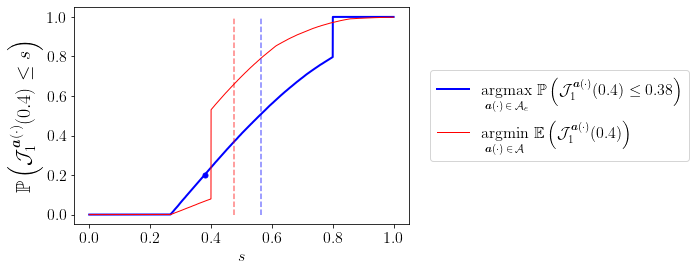

In [6]:
fig, ax = plt.subplots()

for i in range(n_mc):
    ax.plot(S,MC_CDF_list[i],linespecs[i],linewidth=2,label=r'$\mathop{\mathrm{argmax}}\limits_{\bm{a}(\cdot) \, \in \, \mathcal{A}_e} \, \mathbb{P}\left(\mathcal{J}^{\bm{a}(\cdot)}_1(0.4) \le '+str(deadlines[i])+r'\right)$')
ax.plot(S,MC_CDF_EV,'r-',linewidth=1,label=r'$\mathop{\mathrm{argmin}}\limits_{\bm{a}(\cdot) \, \in \, \mathcal{A}} \, \mathbb{E}\left(\mathcal{J}^{\bm{a}(\cdot)}_1(0.4)\right)$')
ax.set_xlabel('$s$')
ax.set_ylabel(r"$\mathbb{P}\left(\mathcal{J}^{\bm{a}(\cdot)}_1(0.4) \le s\right)$", fontsize=mathtextsize)
ax.legend(loc='center left', bbox_to_anchor=(1.04,0.5))

## Add points for deadlines
for i in range(n_mc):
    s1 = int(np.round(deadlines[i] / ds))
    ax.plot(S[s1],MC_CDF_list[i][s1],markers[i],markersize=5)
    
## Add dashed lines for EVs
for i in range(n_mc):
    ax.plot([MC_avg_list[i],MC_avg_list[i]],[0,1],linespecs2[i],alpha=0.5)
ax.plot([MC_avg_EV[0],MC_avg_EV[0]],[0,1],'r--',alpha=0.5)

plt.savefig(write_directory + '/' + name0 + '_CDFs.pdf')
plt.show()